<a href="https://colab.research.google.com/github/YasanthiClair/ML_coursework_/blob/Random-Forest-Classification/MachineLearning_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as labelEncorder
from sklearn.preprocessing import OneHotEncoder as oneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [6]:
#load the dataset
bank_df=pd.read_csv('bank-additional-full.csv',sep=";")# as the dataset is seperated with ";"
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
#Overview the dataset
bank_df.info()
bank_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
#Check for the duplicated rows
Duplicate_rows=bank_df.duplicated().sum()
#Get a numerical value of the duplicated rows
print(f"There are {Duplicate_rows} duplicated rows in the dataset")

There are 12 duplicated rows in the dataset


In [9]:
#View the duplicated rows
bank_df[bank_df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [10]:
#Remove the duplicates from the dataset(As the number of duplicates are less than the entier dataset(12<<<<<41188))
bank_df=bank_df.drop_duplicates()
#Check the dataset (rows and colomns) after removel(Confirm the removel)
bank_df.shape
print(f"There are {bank_df.shape[0]} rows and {bank_df.shape[1]} columns in the dataset")


There are 41176 rows and 21 columns in the dataset


In [11]:
#Overview the dataset
bank_df.info()
bank_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
#Check for the missing values
missing_data=bank_df.isnull().sum
print(missing_data)

<bound method DataFrame.sum of          age    job  marital  education  default  housing   loan  contact  \
0      False  False    False      False    False    False  False    False   
1      False  False    False      False    False    False  False    False   
2      False  False    False      False    False    False  False    False   
3      False  False    False      False    False    False  False    False   
4      False  False    False      False    False    False  False    False   
...      ...    ...      ...        ...      ...      ...    ...      ...   
41183  False  False    False      False    False    False  False    False   
41184  False  False    False      False    False    False  False    False   
41185  False  False    False      False    False    False  False    False   
41186  False  False    False      False    False    False  False    False   
41187  False  False    False      False    False    False  False    False   

       month  day_of_week  ...  campaign  pd

In [13]:
#Drop the rows with the missing values(0 values)
bank_df=bank_df.dropna()

In [14]:
#Check for the dataset after missing values dropped(Since no missing values the dataset no row will be droped)
bank_df.shape
print(f"There are {bank_df.shape[0]} rows and {bank_df.shape[1]} columns in the dataset")

There are 41176 rows and 21 columns in the dataset


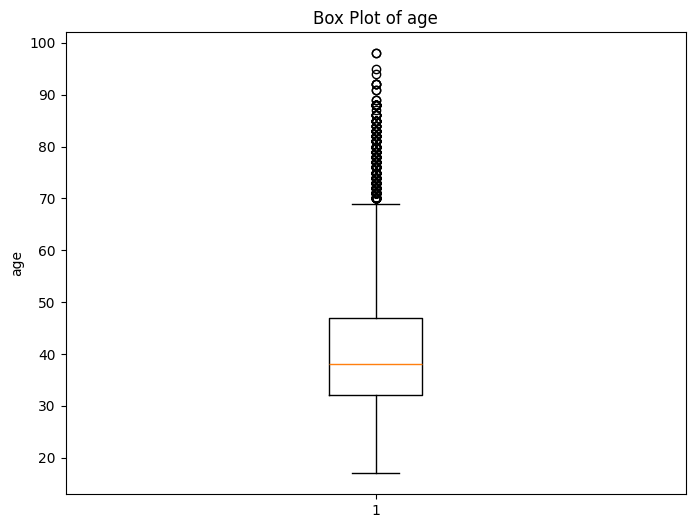

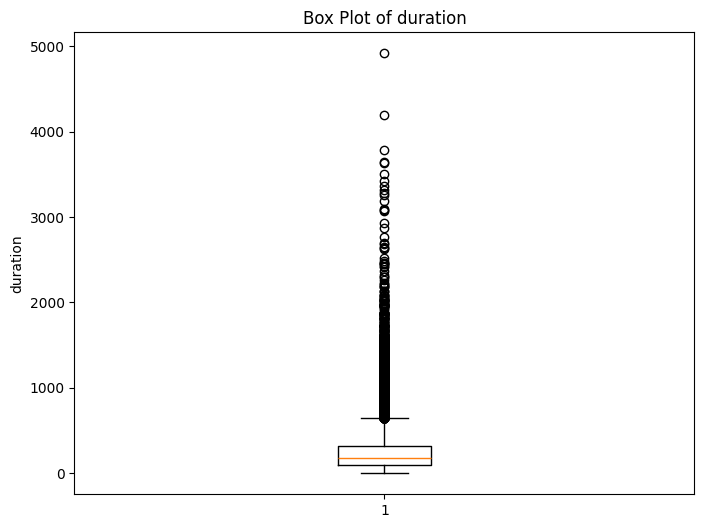

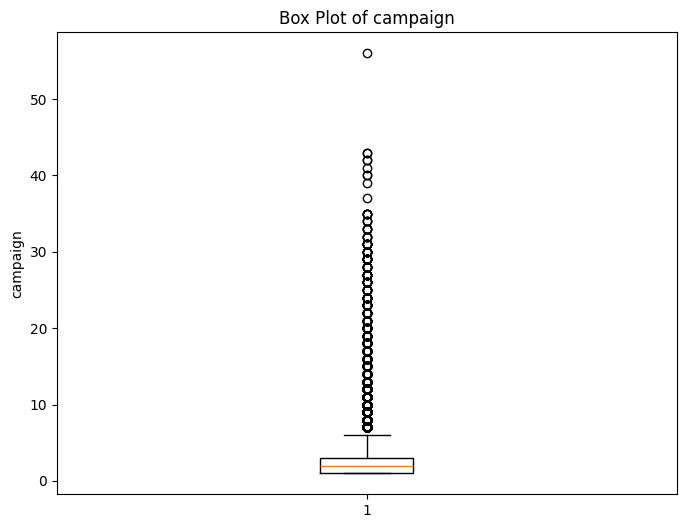

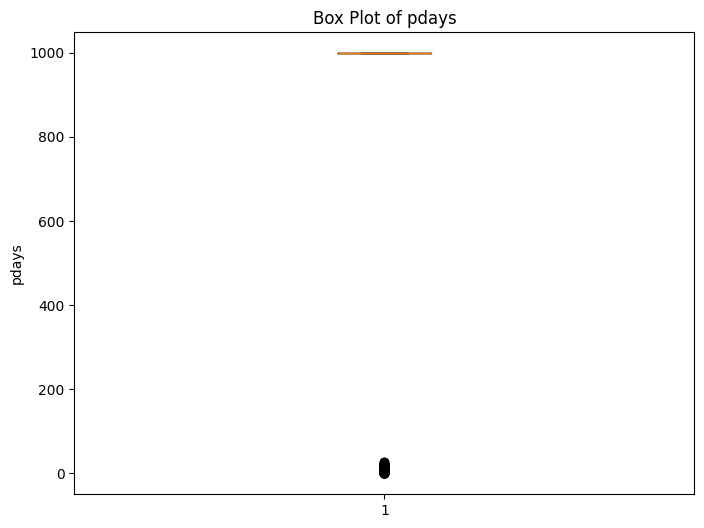

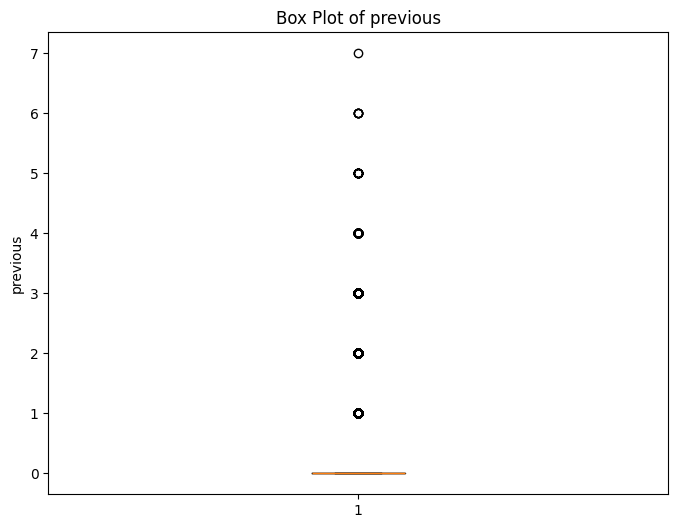

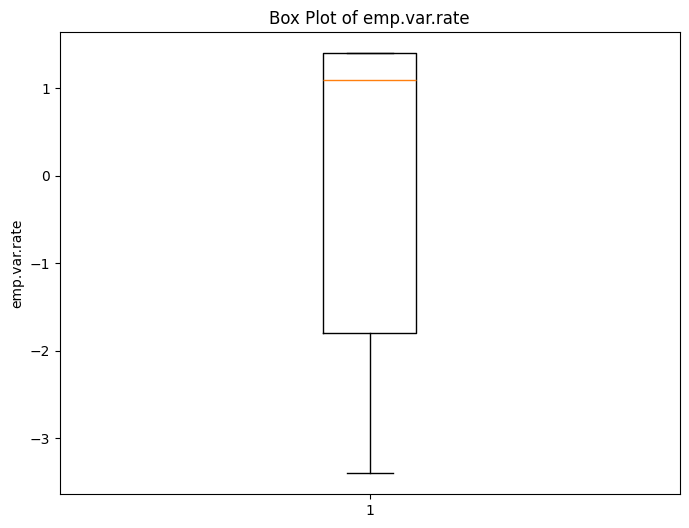

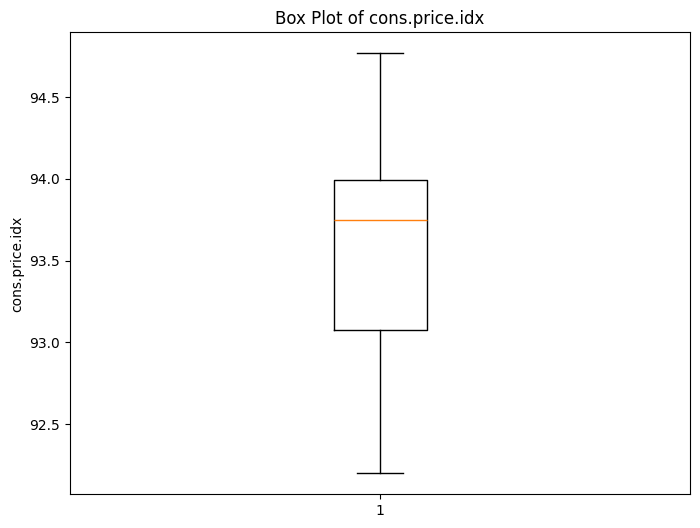

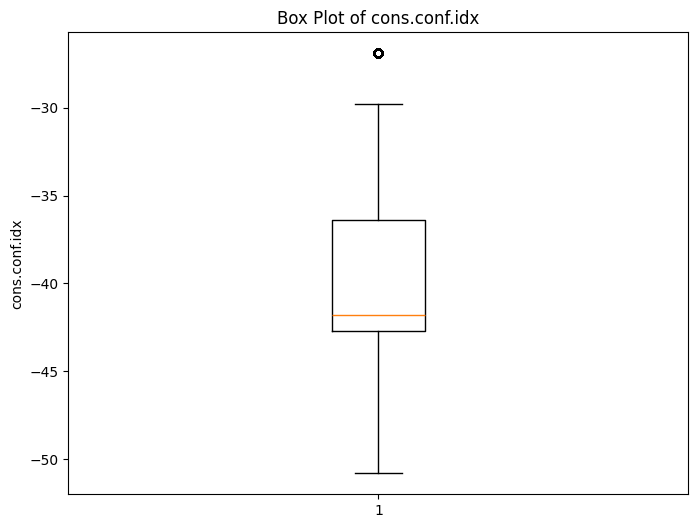

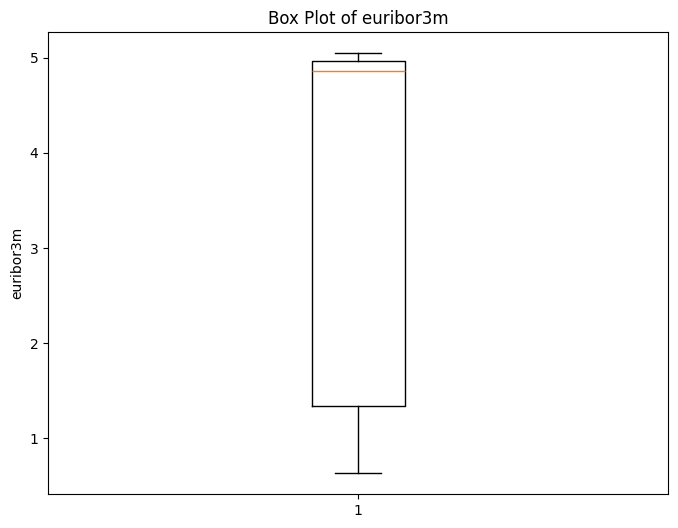

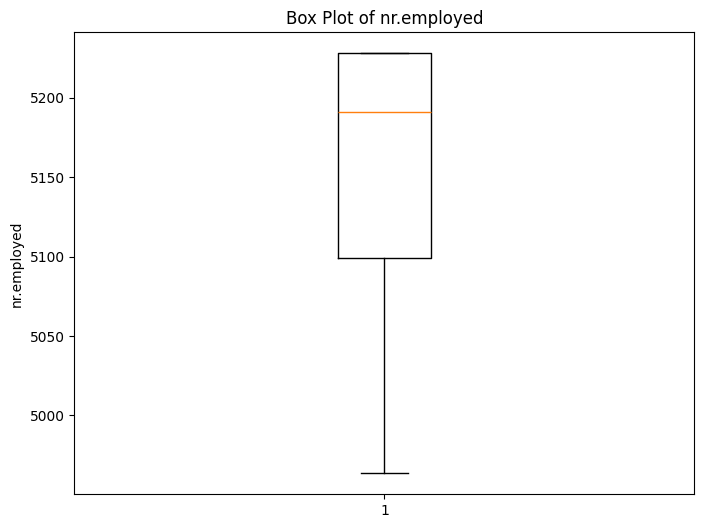

In [15]:
# to check the outliers using xboxplot
numerical_cols=bank_df.select_dtypes(include=['int64','float64']).columns
#to view the each xbox plot of the numercal columns
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    plt.boxplot(bank_df[col])
    plt.title(f'Box Plot of {col}')#add title for recognition
    plt.ylabel(col)#add y axis label with the column name
    plt.show()#view the plot


In [16]:
# Identify outliers using IQR for all numeric columns
outliers_ind =[]#used in storing the indicies of the outliers

for col in bank_df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = bank_df[col].quantile(0.25)
    Q3 = bank_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the indicies rows with outliers for the column
    outlier_indices = bank_df[(bank_df[col] < lower_bound) | (bank_df[col] > upper_bound)].index
    outliers_ind.extend(outlier_indices)
    #get outlies indices
    unique_outlier_indices=list(set(outliers_ind))
    #Assign the outliers to a data frame
    outlier_df=bank_df.loc[unique_outlier_indices]
    #View the outliers in the dataframe
    print(f"Outliers in {col}:")
    print(outlier_df)
    print("\n")


Outliers in age:
       age      job   marital            education  default housing loan  \
40965   81  retired  divorced             basic.4y       no     yes   no   
40966   74  retired   married    university.degree       no     yes   no   
38921   94  retired   married             basic.9y       no      no   no   
40969   84  retired  divorced             basic.4y  unknown     yes   no   
38924   78  retired   married  professional.course       no     yes   no   
...    ...      ...       ...                  ...      ...     ...  ...   
38892   82  retired  divorced             basic.4y       no     yes   no   
38901   83  retired  divorced             basic.4y       no      no   no   
40950   81  retired  divorced             basic.4y       no     yes   no   
40951   70  retired   married  professional.course       no      no   no   
38909   83  retired  divorced             basic.4y       no     yes  yes   

        contact month day_of_week  ...  campaign  pdays  previous  \
4

In [17]:
#save all the outliers to a csv file for easy refering
outlier_df.to_csv('outliers.csv',index=False)

In [18]:
#The minimum and the maximam of the age column
#to make sure the outliers can be avoided(18-100)
age_min=bank_df['age'].min()
age_max=bank_df['age'].max()
print(f"The maximum is:{age_max}")
print(f"The minimum is:{age_min}")

The maximum is:98
The minimum is:17


In [19]:
#get the rows ,age>=18
underAgedf=bank_df[bank_df['age']<18]
print(underAgedf)

       age      job marital education default  housing     loan   contact  \
37140   17  student  single   unknown      no      yes       no  cellular   
37539   17  student  single  basic.9y      no      yes       no  cellular   
37558   17  student  single  basic.9y      no      yes       no  cellular   
37579   17  student  single  basic.9y      no  unknown  unknown  cellular   
38274   17  student  single   unknown      no       no      yes  cellular   

      month day_of_week  ...  campaign  pdays  previous  poutcome  \
37140   aug         wed  ...         3      4         2   success   
37539   aug         fri  ...         2    999         2   failure   
37558   aug         fri  ...         3      4         2   success   
37579   aug         fri  ...         2    999         1   failure   
38274   oct         tue  ...         1      2         2   success   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
37140         -2.9          92.201       

In [20]:
#Encode categorical Features
Categorical_columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

Label=labelEncorder()
for col in Categorical_columns:
    bank_df[col]=Label.fit_transform(bank_df[col])

In [21]:
#View the encoded features(comfirm the encoding)
print(bank_df)

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  ...  campaign  pdays  previous 

In [22]:
#Normalize numerical features
Numerical_columns=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
scaler=StandardScaler()
bank_df[Numerical_columns]=scaler.fit_transform(bank_df[Numerical_columns])
#Confirming
print(bank_df)

            age  job  marital  education  default  housing  loan  contact  \
0      1.533143    3        1          0        0        0     0        1   
1      1.629107    7        1          3        1        0     0        1   
2     -0.290177    7        1          3        0        2     0        1   
3     -0.002284    0        1          1        0        0     0        1   
4      1.533143    7        1          3        0        0     2        1   
...         ...  ...      ...        ...      ...      ...   ...      ...   
41183  3.164534    5        1          5        0        2     0        0   
41184  0.573501    1        1          5        0        0     0        0   
41185  1.533143    5        1          6        0        2     0        0   
41186  0.381573    9        1          5        0        0     0        0   
41187  3.260499    5        1          5        0        2     0        0   

       month  day_of_week  ...  campaign     pdays  previous  poutcome  \
0

In [23]:
#Encoding the targeted variable
#Convert(yes/no)to 1 and 0(1=yes,0=no)
bank_df['y']=bank_df['y'].apply(lambda x:1 if x=='yes' else 0)

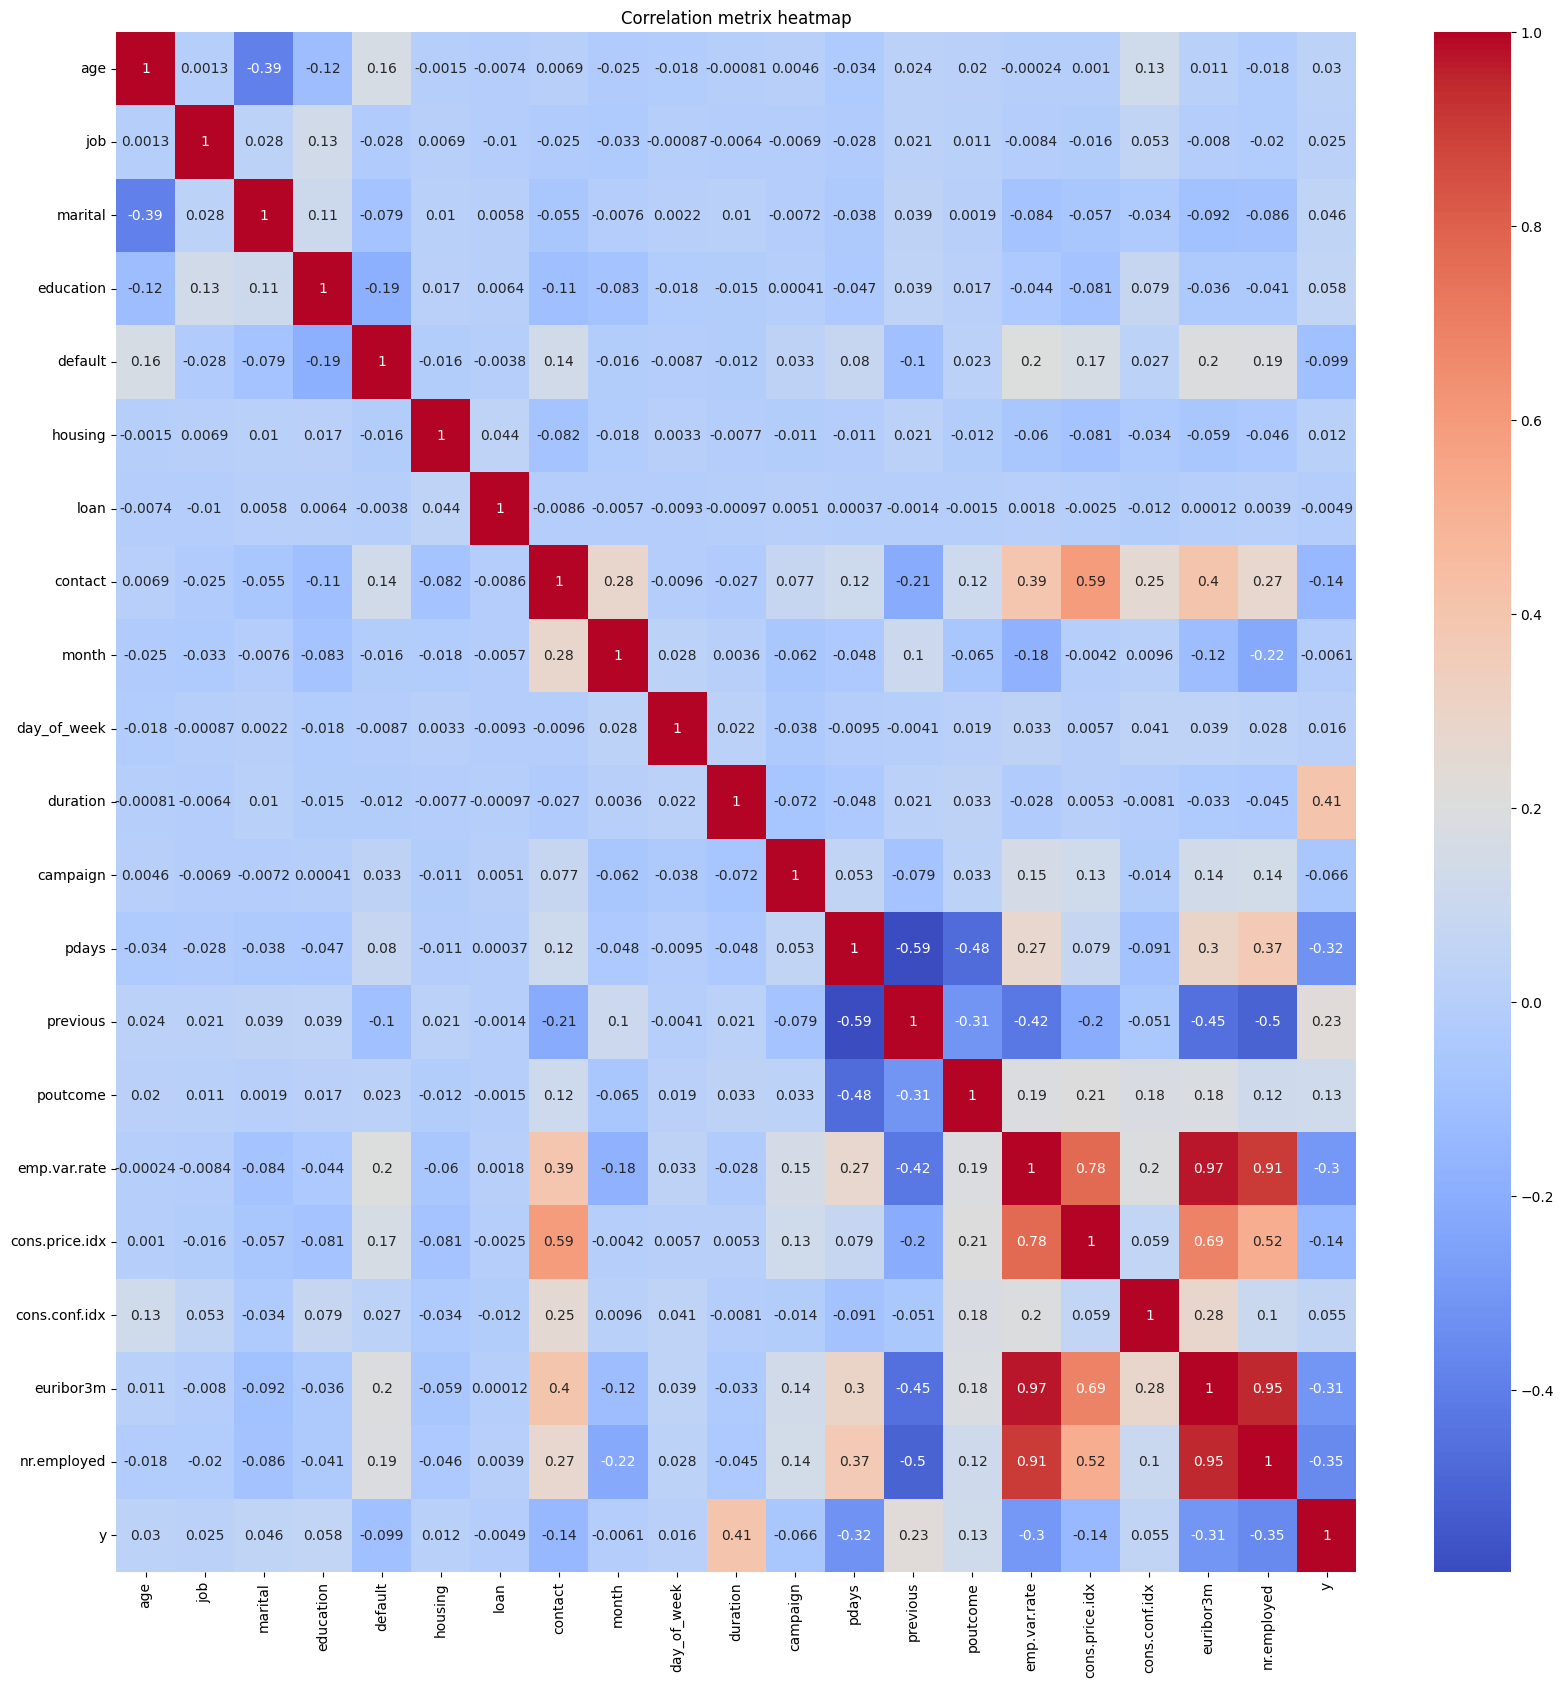

In [24]:
#Check for the correlation of each feature
correlation_metrix=bank_df.corr
plt.figure(figsize=(20,20))
sns.heatmap(bank_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation metrix heatmap')
plt.show()

In [25]:
#overview of the dataset
bank_df.info()
bank_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  float64
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  float64
 12  pdays           41176 non-null  float64
 13  previous        41176 non-null  float64
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4.117600e+04,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,4.117600e+04,4.117600e+04,4.117600e+04,41176.000000,4.117600e+04,4.117600e+04,4.117600e+04,4.117600e+04,4.117600e+04,41176.000000
mean,1.001724e-16,3.724184,1.172746,3.746916,0.208908,1.071789,0.327521,0.365286,4.231033,2.004614,...,3.727347e-17,-1.090594e-16,6.902494e-18,0.930081,4.141496e-17,2.599755e-14,-7.178594e-17,2.250213e-16,4.638476e-15,0.112663
std,1.000012e+00,3.594459,0.608905,2.136539,0.406713,0.985305,0.723700,0.481516,2.319973,1.397692,...,1.000012e+00,1.000012e+00,1.000012e+00,0.362937,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.316184
min,-2.209460e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.659633e-01,-5.148665e+00,-3.495514e-01,0.000000,-2.216565e+00,-2.374990e+00,-2.225059e+00,-1.722363e+00,-2.815689e+00,0.000000
25%,-7.699975e-01,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,-5.659633e-01,1.954435e-01,-3.495514e-01,1.000000,-1.198017e+00,-8.650522e-01,-4.747688e-01,-1.313003e+00,-9.402687e-01,0.000000
50%,-1.942124e-01,2.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,-2.049895e-01,1.954435e-01,-3.495514e-01,1.000000,6.481012e-01,2.993617e-01,-2.802921e-01,7.124626e-01,3.316951e-01,0.000000
75%,6.694654e-01,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,1.559842e-01,1.954435e-01,-3.495514e-01,1.000000,8.390789e-01,7.226279e-01,8.865681e-01,7.724252e-01,8.451864e-01,0.000000
max,5.563639e+00,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,1.928759e+01,1.954435e-01,1.379305e+01,2.000000,8.390789e-01,2.058076e+00,2.939378e+00,8.208565e-01,8.451864e-01,1.000000


In [26]:
#Remove one of the highly correlated feature (euribor3m)
bank_df2=bank_df.drop('euribor3m',axis=1)

In [27]:
#over view of the dataset
bank_df2.info()
bank_df2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  float64
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  float64
 12  pdays           41176 non-null  float64
 13  previous        41176 non-null  float64
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
count,4.117600e+04,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,4.117600e+04,4.117600e+04,4.117600e+04,4.117600e+04,41176.000000,4.117600e+04,4.117600e+04,4.117600e+04,4.117600e+04,41176.000000
mean,1.001724e-16,3.724184,1.172746,3.746916,0.208908,1.071789,0.327521,0.365286,4.231033,2.004614,9.318367e-17,3.727347e-17,-1.090594e-16,6.902494e-18,0.930081,4.141496e-17,2.599755e-14,-7.178594e-17,4.638476e-15,0.112663
std,1.000012e+00,3.594459,0.608905,2.136539,0.406713,0.985305,0.723700,0.481516,2.319973,1.397692,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.362937,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.316184
min,-2.209460e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.961961e-01,-5.659633e-01,-5.148665e+00,-3.495514e-01,0.000000,-2.216565e+00,-2.374990e+00,-2.225059e+00,-2.815689e+00,0.000000
25%,-7.699975e-01,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,-6.028326e-01,-5.659633e-01,1.954435e-01,-3.495514e-01,1.000000,-1.198017e+00,-8.650522e-01,-4.747688e-01,-9.402687e-01,0.000000
50%,-1.942124e-01,2.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,-3.020253e-01,-2.049895e-01,1.954435e-01,-3.495514e-01,1.000000,6.481012e-01,2.993617e-01,-2.802921e-01,3.316951e-01,0.000000
75%,6.694654e-01,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,2.340288e-01,1.559842e-01,1.954435e-01,-3.495514e-01,1.000000,8.390789e-01,7.226279e-01,8.865681e-01,8.451864e-01,0.000000
max,5.563639e+00,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,1.797009e+01,1.928759e+01,1.954435e-01,1.379305e+01,2.000000,8.390789e-01,2.058076e+00,2.939378e+00,8.451864e-01,1.000000


In [28]:
#save the preprocessed dataset
#save the dataset to a new csv file
bank_df2.to_csv('processed_bank_additional_full.csv',index=False)
#confirm message of succesfull csv file saving
print('CSV file saved successfully')


CSV file saved successfully


In [29]:
#load the preprocesssed dataset
pre_bank_df=pd.read_csv('processed_bank_additional_full.csv')
pre_bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,1.533143,3,1,0,0,0,0,1,6,1,0.010352,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.331695,0
1,1.629107,7,1,3,1,0,0,1,6,1,-0.421577,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.331695,0
2,-0.290177,7,1,3,0,2,0,1,6,1,-0.124626,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.331695,0
3,-0.002284,0,1,1,0,0,0,1,6,1,-0.413864,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.331695,0
4,1.533143,7,1,3,0,0,2,1,6,1,0.187751,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.331695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,3.164534,5,1,5,0,2,0,0,7,0,0.291876,-0.565963,0.195443,-0.349551,1,-0.752402,2.058076,-2.225059,-2.815689,1
41172,0.573501,1,1,5,0,0,0,0,7,0,0.480845,-0.565963,0.195443,-0.349551,1,-0.752402,2.058076,-2.225059,-2.815689,0
41173,1.533143,5,1,6,0,2,0,0,7,0,-0.267317,-0.204990,0.195443,-0.349551,1,-0.752402,2.058076,-2.225059,-2.815689,0
41174,0.381573,9,1,5,0,0,0,0,7,0,0.708379,-0.565963,0.195443,-0.349551,1,-0.752402,2.058076,-2.225059,-2.815689,1


In [30]:
#split the data into the target (y) and features(x)
x=pre_bank_df.drop('y',axis=1)
y=pre_bank_df['y']


In [31]:
#Splitting data for training and testing(80%-training,20%-testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
#The Neural netwwork
model = Sequential([
    Dense(64, input_dim=x_train.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

#Run the model in test data
y_pred = (model.predict(x_test)>0.5).astype("int32")


#Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8596 - loss: 0.3034 - val_accuracy: 0.9038 - val_loss: 0.2142
Epoch 2/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9130 - loss: 0.1923 - val_accuracy: 0.9068 - val_loss: 0.2047
Epoch 3/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9137 - loss: 0.1885 - val_accuracy: 0.9103 - val_loss: 0.1989
Epoch 4/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9150 - loss: 0.1874 - val_accuracy: 0.9063 - val_loss: 0.2052
Epoch 5/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9152 - loss: 0.1815 - val_accuracy: 0.9104 - val_loss: 0.1943
Epoch 6/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9184 - loss: 0.1833 - val_accuracy: 0.9071 - val_loss: 0.2043
Epoch 7/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9179 - loss: 0.1807 - val_accuracy: 0.9076 - val_loss: 0.1927
Epoch 8/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9161 - loss: 0.1818 - val_accuracy: 0.9111 - val_

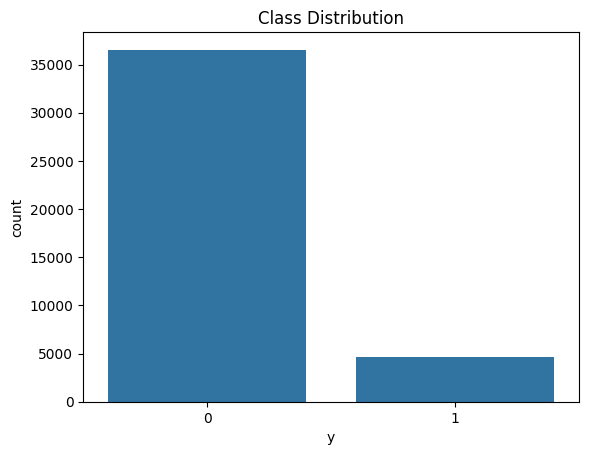

In [38]:
#view the classes(Inbalance of the classes)
sns.countplot(x='y', data=bank_df)
plt.title('Class Distribution')
plt.show()

In [42]:
#In order to balance the class,use the SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
#Check the over sampaling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


Before SMOTE: y
0    29272
1     3668
Name: count, dtype: int64
After SMOTE: y
0    29272
1    29272
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [47]:
#The Neural netwwork used again after balancing the classes
model = Sequential([
    Dense(64, input_dim=x_train_resampled.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
model.fit(x_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

#Run the model in test data
y_pred = (model.predict(x_test)>0.5).astype("int32")

#Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8259 - loss: 0.3715 - val_accuracy: 0.8854 - val_loss: 0.3455
Epoch 2/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8833 - loss: 0.2767 - val_accuracy: 0.9424 - val_loss: 0.2264
Epoch 3/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8875 - loss: 0.2643 - val_accuracy: 0.9313 - val_loss: 0.2613
Epoch 4/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8939 - loss: 0.2481 - val_accuracy: 0.9551 - val_loss: 0.2007
Epoch 5/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8980 - loss: 0.2421 - val_accuracy: 0.9285 - val_loss: 0.2442
Epoch 6/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9001 - loss: 0.2369 - val_accuracy: 0.9267 - val_loss: 0.2548
Epoch 7/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9041 - loss: 0.2314 - val_accuracy: 0.9353 - val_loss: 0.2283
Epoch 8/10
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9052 - loss: 0.2263 - val_accurac

In [50]:
#Random Forest Classification
#100 trees ncludes in the model
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

#Train the model
rf_model.fit(x_train,y_train)

#Predict on test data
y_pred=rf_model.predict(x_test)

#Evaluate the model
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[7021  244]
 [ 489  482]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.66      0.50      0.57       971

    accuracy                           0.91      8236
   macro avg       0.80      0.73      0.76      8236
weighted avg       0.90      0.91      0.91      8236



In [56]:
#Random Forest Classification along with resamplaling (balancing the classes)
#100 trees ncludes in the model
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

#Train the model
rf_model.fit(x_train_resampled,y_train_resampled)

#Predict on test data
y_pred=rf_model.predict(x_test)

#Evaluate the model
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[6706  559]
 [ 295  676]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      7265
           1       0.55      0.70      0.61       971

    accuracy                           0.90      8236
   macro avg       0.75      0.81      0.78      8236
weighted avg       0.91      0.90      0.90      8236



258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


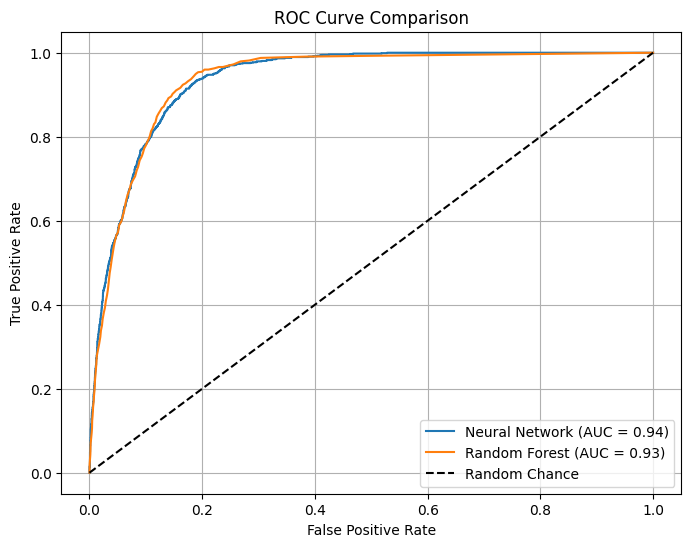

In [59]:

# Neural Network predictions
# Assuming `y_pred_nn` contains predictions and `model.predict_proba(X_test)` gives probabilities
y_prob_nn = model.predict(x_test).ravel()  # Use ravel() if probabilities are in a 2D array
roc_auc_nn = roc_auc_score(y_test, y_prob_nn)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

# Random Forest predictions
y_prob_rf = rf_model.predict_proba(x_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()